# Setup

In [2]:
import pandas as pd
import seaborn as sns

%matplotlib inline

In [3]:
import matplotlib.transforms as transforms
import matplotlib.pyplot as plt

In [4]:
sns.set(rc={'figure.figsize':(24, 13.5)}, font_scale = 2.7)

In [5]:
#input args
out_dir = './out'
log_id = 1

#derived args
split_logs_dir = f'{out_dir}/split_logs/'

In [6]:
#access all 3 measurement axes
dim3 = lambda x : [x + '_' + s for s in ['x', 'y', 'z']]

# State preparation

In [7]:
state_log = pd.read_csv(f'{split_logs_dir}/state_transitions.csv', index_col = 0)
state_log.head()

,Timestamp,Log Entry Type,State,Time_s
Log Entry,,,,
136,701,STATE,IDLE,0.701
144,711,STATE,IDLE,0.711
152,721,STATE,IDLE,0.721
160,731,STATE,IDLE,0.731
168,741,STATE,IDLE,0.741


In [8]:
state_log.State.unique()

array(['IDLE'], dtype=object)

In [9]:
state_transitions = state_log.loc[state_log['State'].shift(1) != state_log['State']]

In [10]:
for state_transition in state_transitions.to_dict(orient = 'rows'):
    print(state_transition)

{'Timestamp': 701, 'Log Entry Type': 'STATE', 'State': 'IDLE', 'Time_s': 0.701}


In [11]:
def plot_states(state_transitions):
    for state_transition in state_transitions.to_dict(orient = 'rows'):
        ax.axvline(state_transition['Time_s'], color='grey', linestyle='--')
        ax.text(state_transition['Time_s'], 0.1, state_transition['State'], fontsize=20, transform=ax.get_xaxis_transform(), rotation=90)

# IMU Plotting

In [12]:
imu_log = pd.read_csv(f'{split_logs_dir}/imu.csv', index_col = 0)
imu_log.head()

,Timestamp,Time_s,Log Entry Type,Sensor Board ID,Sensor Board Timestamp,Sensor Type,Acc_x,Acc_y,Acc_z,Gyro_x,Gyro_y,Gyro_z
Log Entry,,,,,,,,,,,,
4,511,0.511,SENSOR,1,0,IMU,0.0,0.0,0.0,0.0,0.0,0.0
6,511,0.511,SENSOR,2,0,IMU,0.0,0.0,0.0,0.0,0.0,0.0
9,511,0.511,SENSOR,3,0,IMU,0.0,0.0,0.0,0.0,0.0,0.0
13,521,0.521,SENSOR,1,0,IMU,0.0,0.0,0.0,0.0,0.0,0.0
15,521,0.521,SENSOR,2,0,IMU,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
#convert from wide to long format for plotting

imu_log.reset_index(inplace = True)
imu_log_long = pd.wide_to_long(imu_log, stubnames=['Acc', 'Gyro'], i = 'Log Entry', j='Axis', sep='_', suffix='\w')
imu_log_long['Axis'] = imu_log_long.index.get_level_values(1)
#sampling for faster drawing
imu_log_long = imu_log_long[::10]
imu_log_long.head()

,,index,Sensor Type,Sensor Board ID,Sensor Board Timestamp,Timestamp,Log Entry Type,Time_s,Acc,Gyro,Axis
Log Entry,Axis,,,,,,,,,,
4,x,0,IMU,1,0,511,SENSOR,0.511,0.0,0.0,x
27,x,10,IMU,2,0,541,SENSOR,0.541,0.0,0.0,x
47,x,20,IMU,3,0,571,SENSOR,0.571,0.0,0.0,x
68,x,30,IMU,1,0,611,SENSOR,0.611,0.0,0.0,x
91,x,40,IMU,2,0,641,SENSOR,0.641,0.0,0.0,x


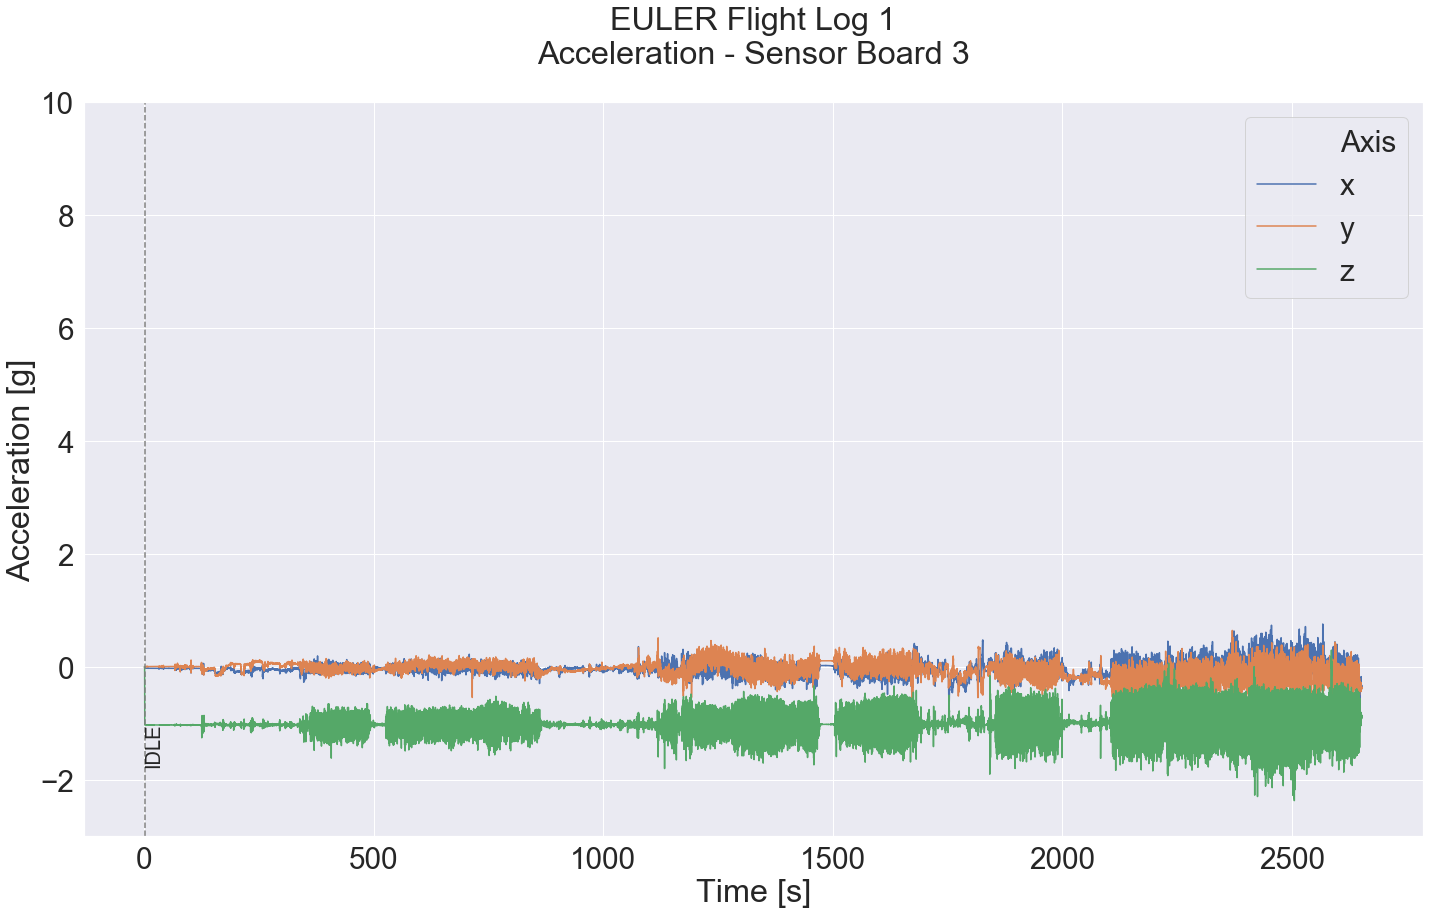

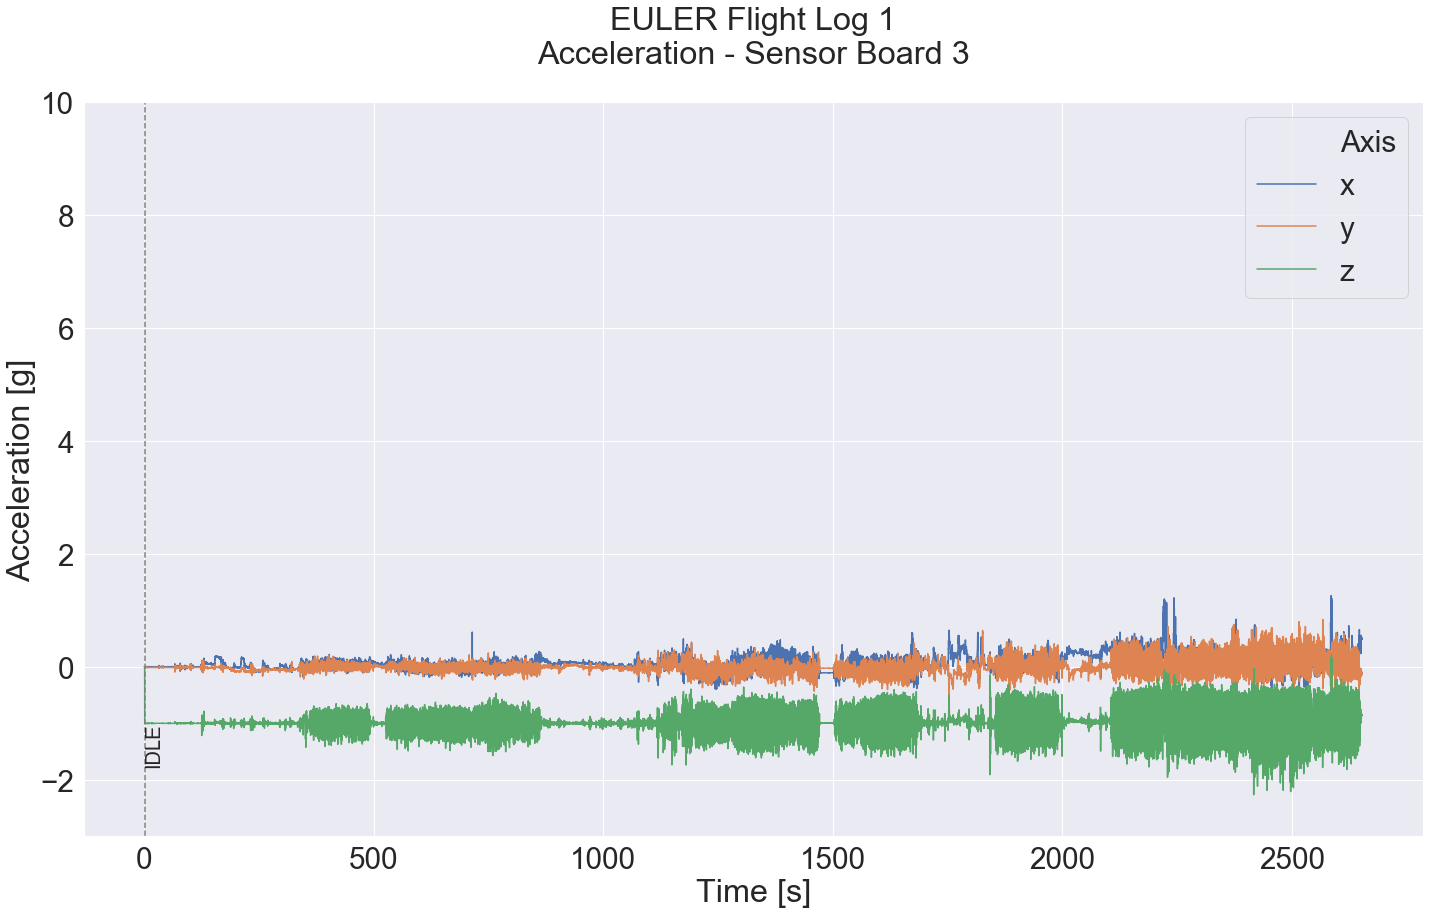

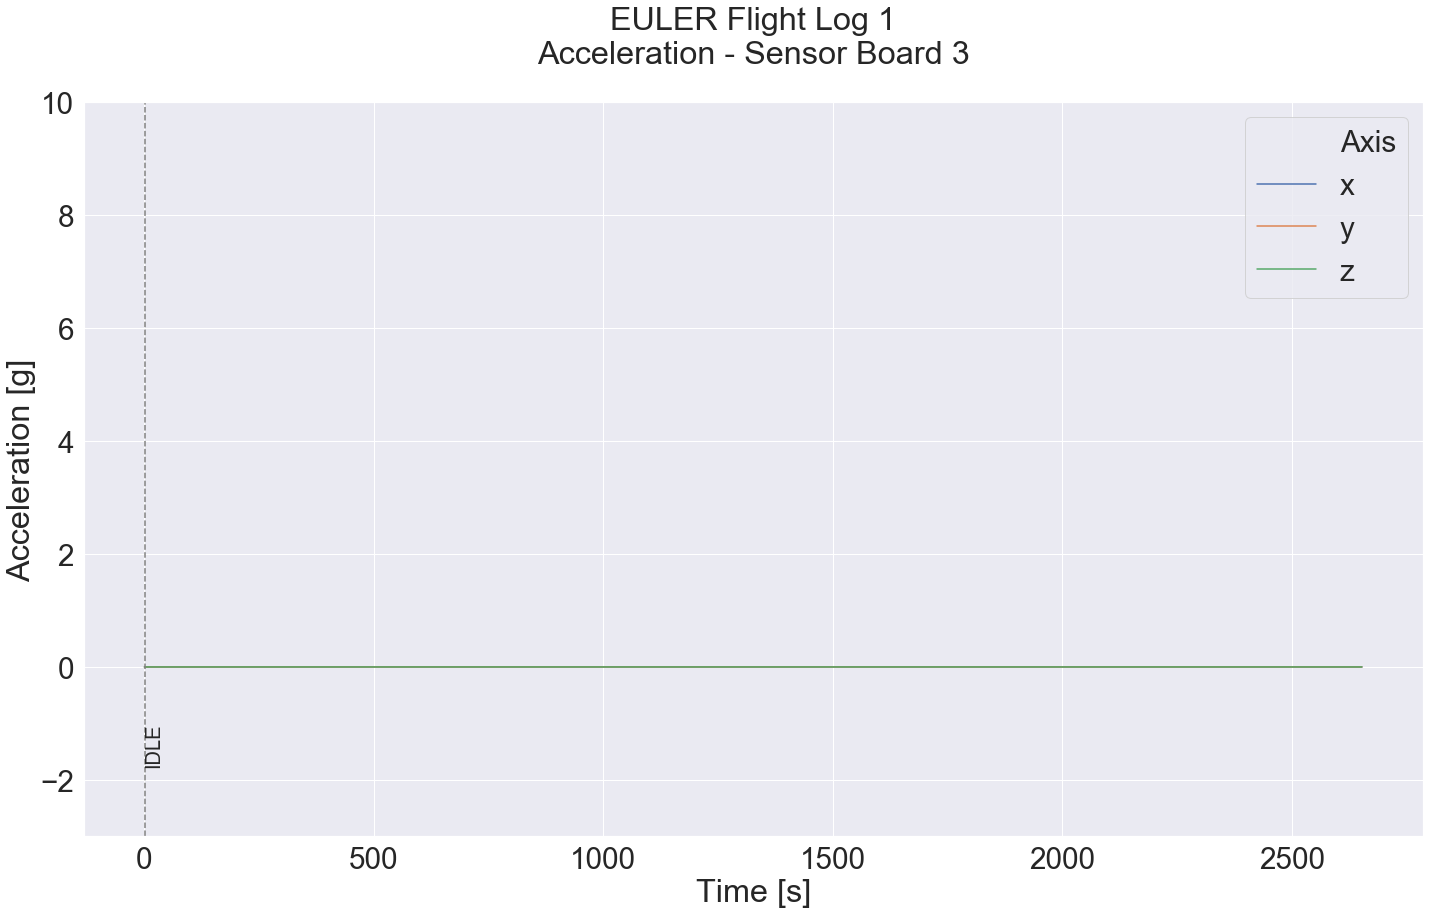

In [16]:
for sb_id in range(1, 4):
    ax = sns.lineplot(data = imu_log_long[imu_log_long['Sensor Board ID'] == sb_id], x = 'Time_s', y = 'Acc', hue = 'Axis')
    ax.set_title(f'EULER Flight Log {log_id}\nAcceleration - Sensor Board 3\n')
    ax.set_ylabel('Acceleration [g]')
    ax.set_xlabel('Time [s]')
    ax.legend(loc="upper right")
    ax.set_ylim(-3, 10)
    plot_states(state_transitions)
    plt.show()

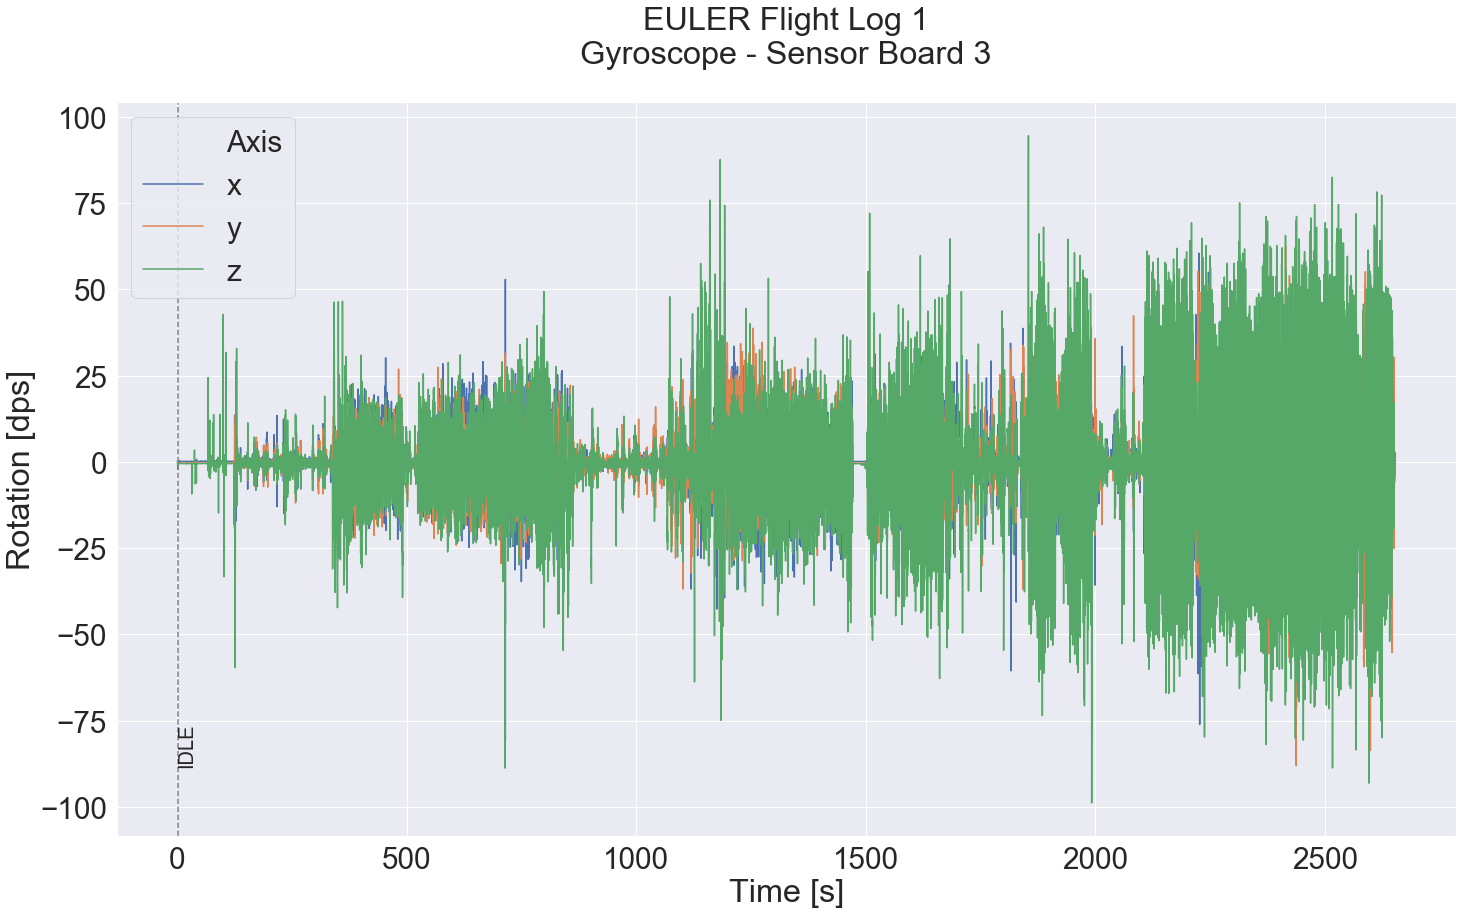

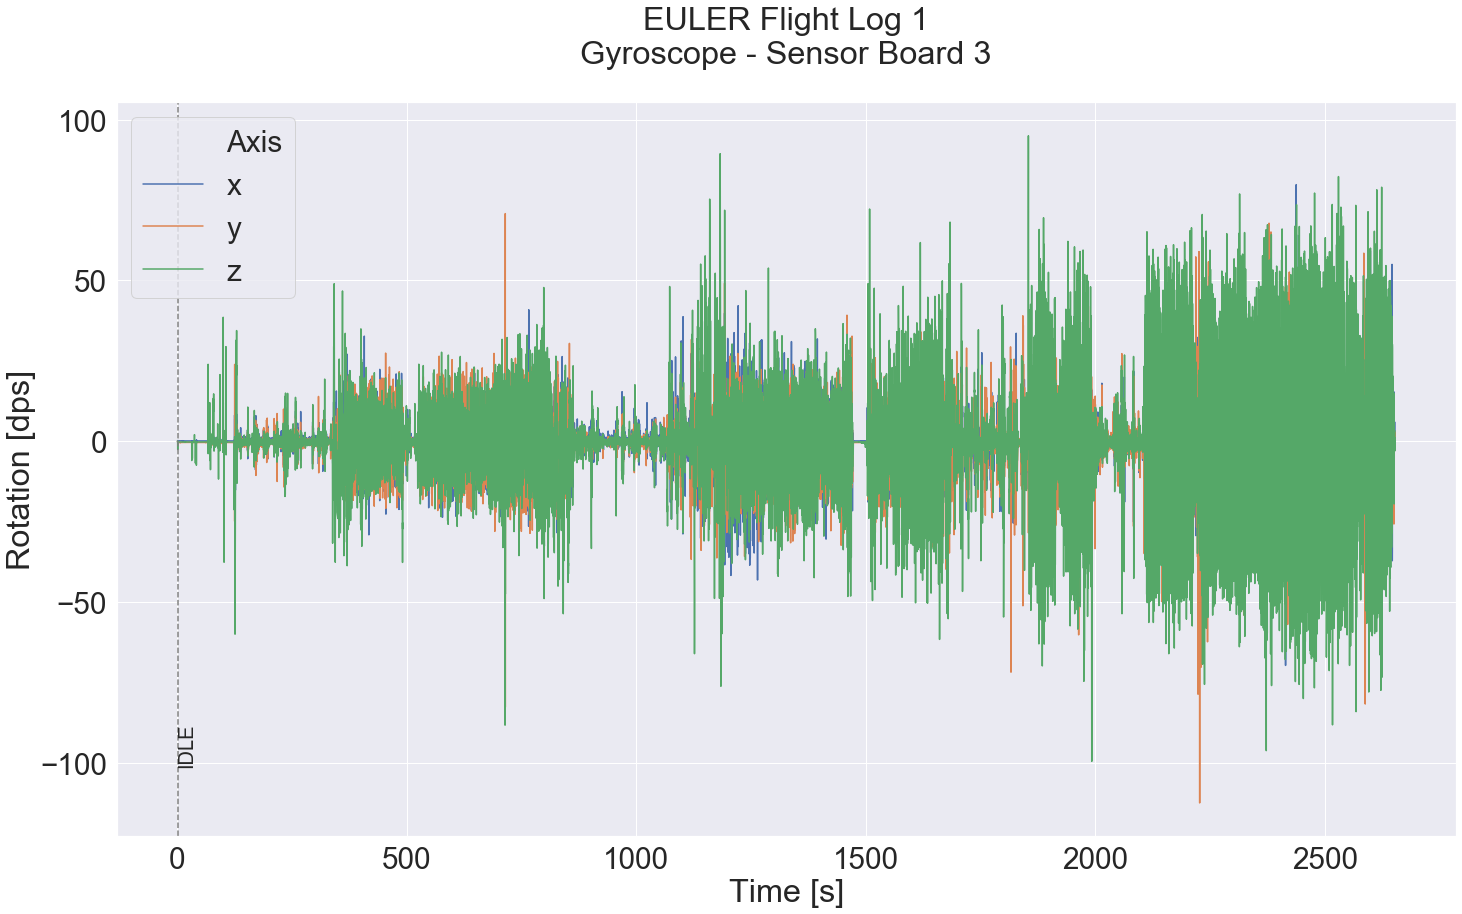

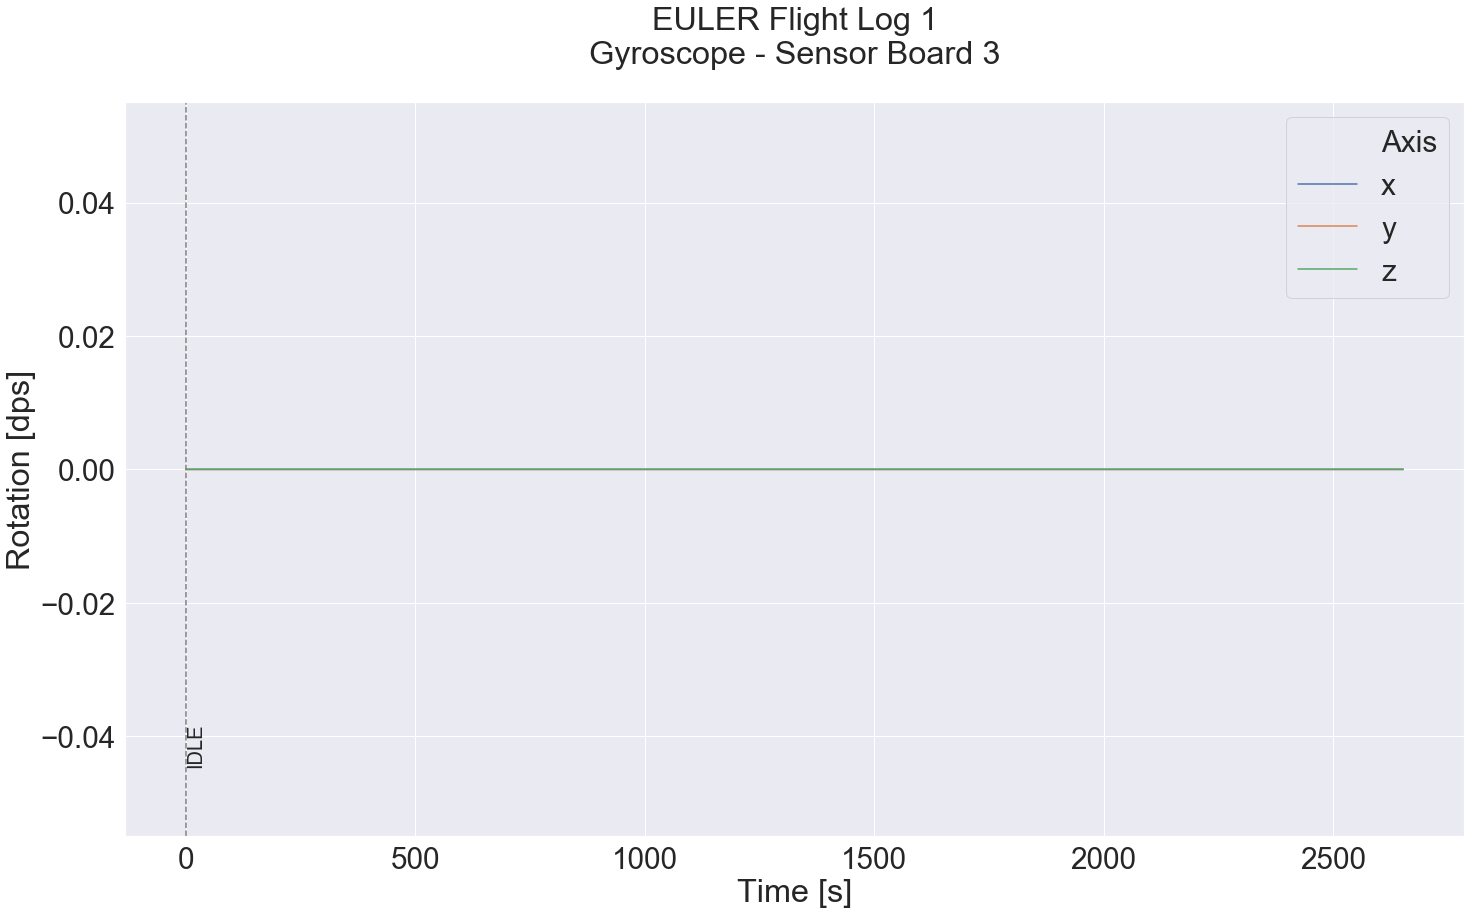

In [17]:
for sb_id in range(1, 4):
    ax = sns.lineplot(data = imu_log_long[imu_log_long['Sensor Board ID'] == sb_id], x = 'Time_s', y = 'Gyro', hue = 'Axis')
    ax.set_title(f'EULER Flight Log {log_id}\nGyroscope - Sensor Board 3\n')
    ax.set_ylabel('Rotation [dps]')
    ax.set_xlabel('Time [s]')
    plot_states(state_transitions)
    plt.show()

# Baro + Temp Plotting

In [18]:
baro_log = pd.read_csv(f'{split_logs_dir}/baro.csv', index_col = 0)
#sampling for faster drawing
baro_log = baro_log[::10]
baro_log.head()
baro_log['Sensor Board ID'] = baro_log['Sensor Board ID'].apply(str).apply(lambda x: 'SB ' + x)

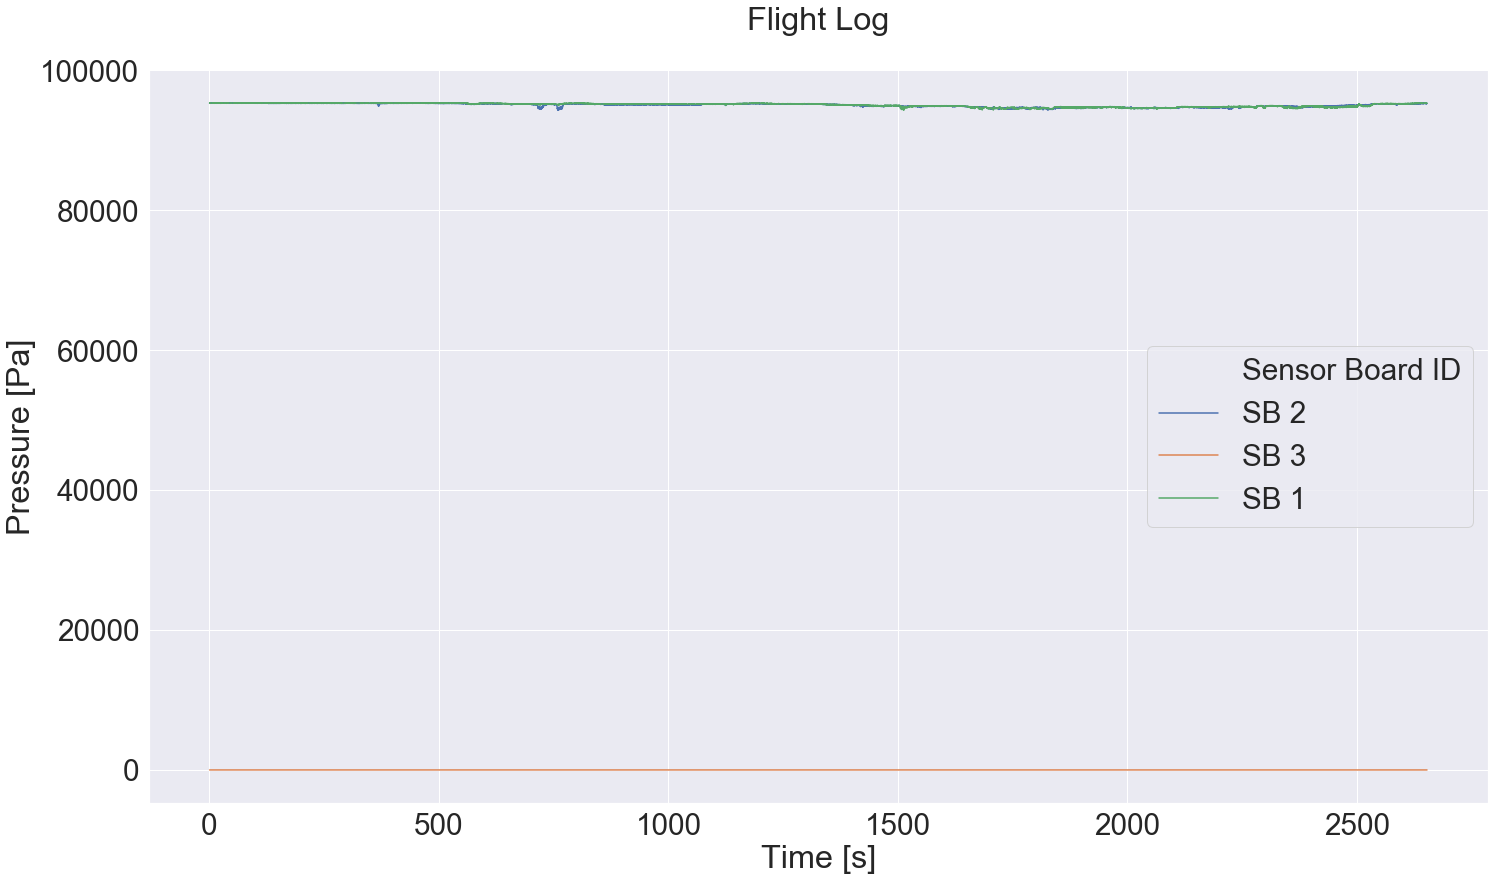

In [19]:
plt = sns.lineplot(data = baro_log[1:], x = 'Time_s', y = 'Pressure', hue = 'Sensor Board ID')
plt.set_title('Flight Log\n')
#plt.set_ylim(-3300, -3100)
plt.set_ylabel('Pressure [Pa]')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

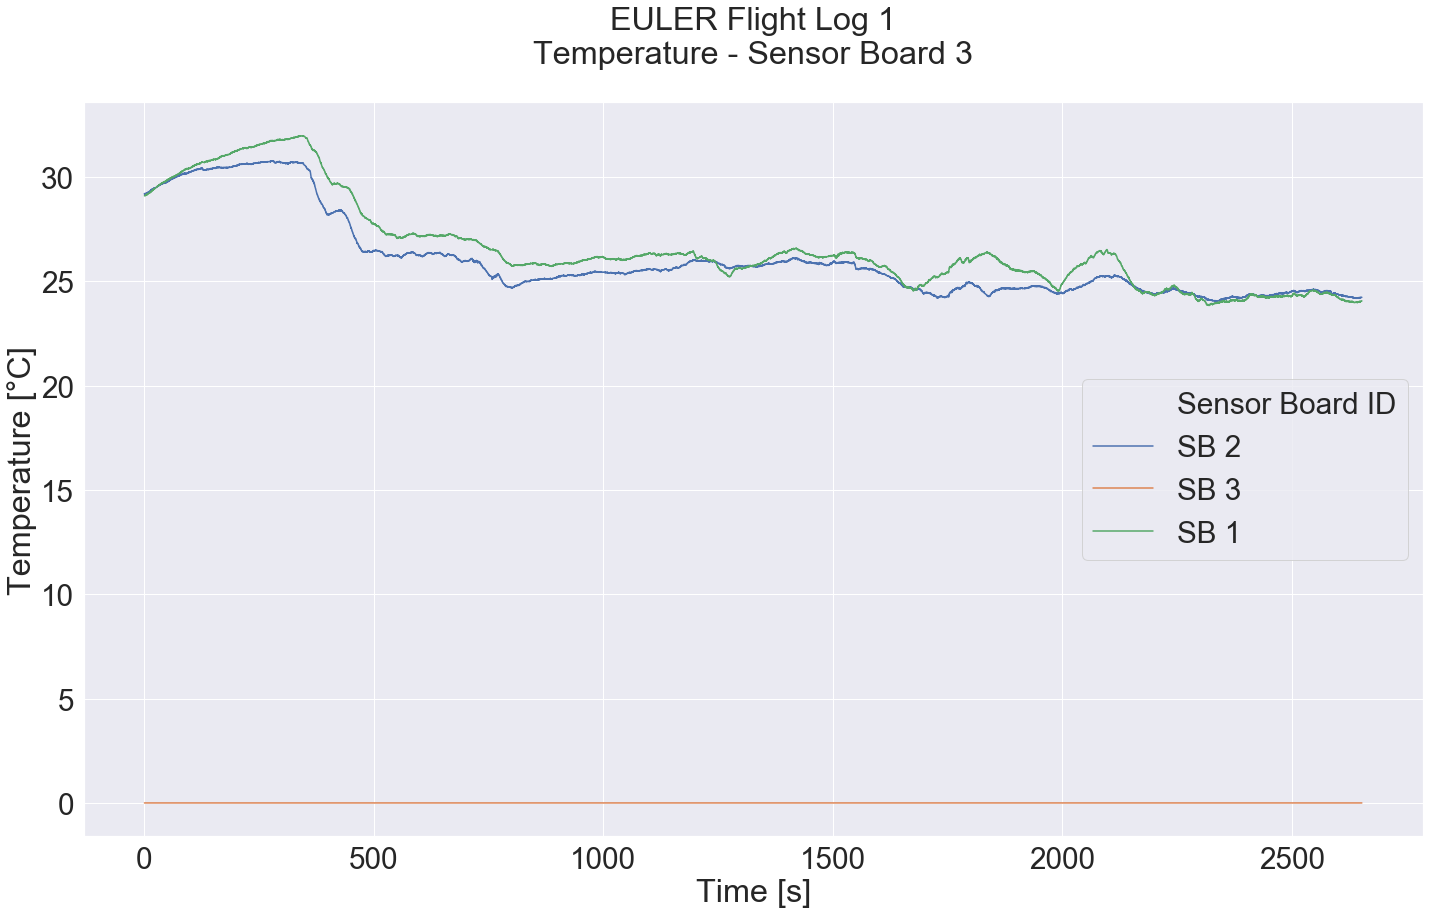

In [20]:
plt = sns.lineplot(data = baro_log[1:], x = 'Time_s', y = 'Temperature', hue = 'Sensor Board ID')
plt.set_title(f'EULER Flight Log {log_id}\nTemperature - Sensor Board 3\n')
plt.set_ylabel('Temperature [\N{DEGREE SIGN}C]')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)
#plt.set_ylim(-3300, -3100)
#ylabels = ['{:,.1f}'.format(y) + '\N{DEGREE SIGN}C' for y in plt.get_yticks()]
#plt.set_yticklabels(ylabels)

## Battery Plotting

In [21]:
battery_log = pd.read_csv(f'{split_logs_dir}/battery.csv', index_col = 0)
#sampling for faster drawing
battery_log = battery_log[::10]
battery_log.head()

,Timestamp,Time_s,Log Entry Type,Sensor Board ID,Sensor Type,Battery,Consumption,Current,Supply
Log Entry,,,,,,,,,
453,1078,1.078,SENSOR,1,BATTERY,11401,0,81,3299
9887,11278,11.278,SENSOR,1,BATTERY,11392,0,150,3307
19341,21478,21.478,SENSOR,1,BATTERY,11396,0,158,3308
26589,31678,31.678,SENSOR,1,BATTERY,11400,1,133,3309
36043,41878,41.878,SENSOR,1,BATTERY,11406,1,151,3311


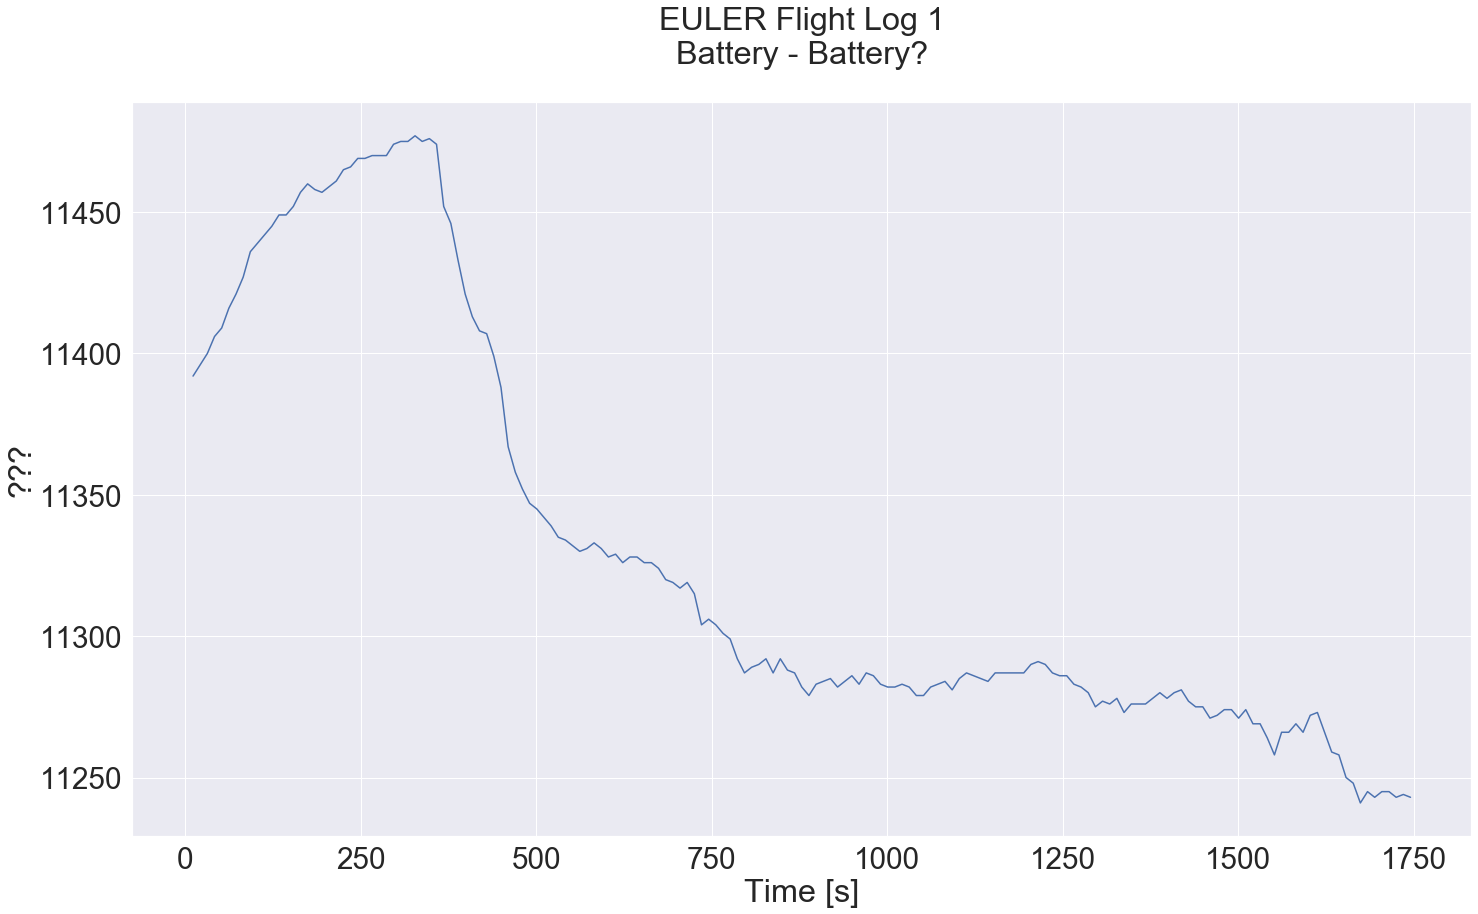

In [22]:
plt = sns.lineplot(data = battery_log[1:], x = 'Time_s', y = 'Battery')
plt.set_title(f'EULER Flight Log {log_id}\nBattery - Battery?\n')
plt.set_ylabel('???')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

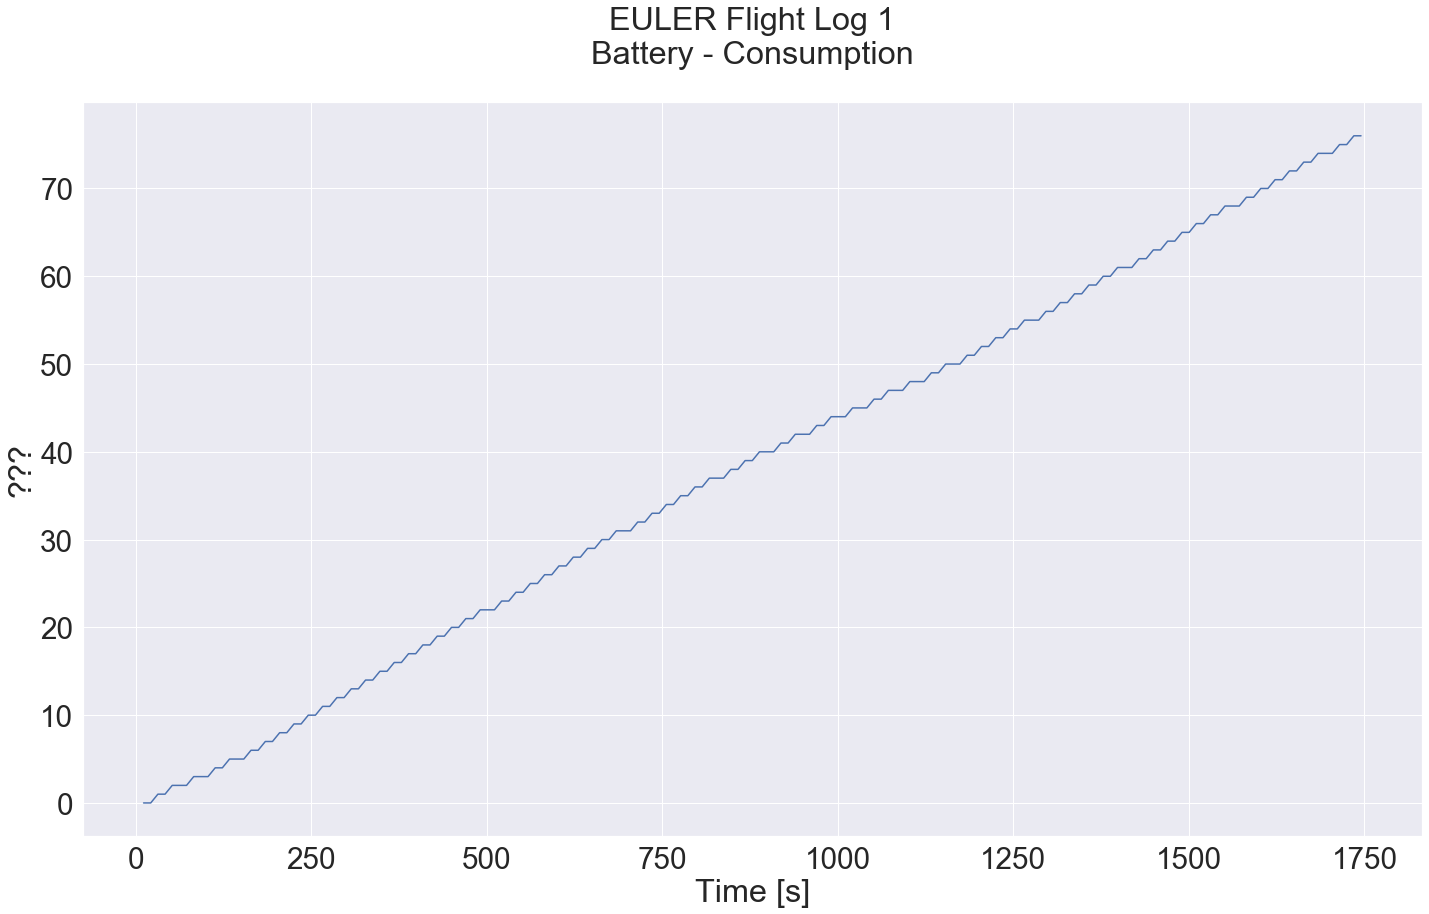

In [23]:
plt = sns.lineplot(data = battery_log[1:], x = 'Time_s', y = 'Consumption')
plt.set_title(f'EULER Flight Log {log_id}\nBattery - Consumption\n')
plt.set_ylabel('???')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

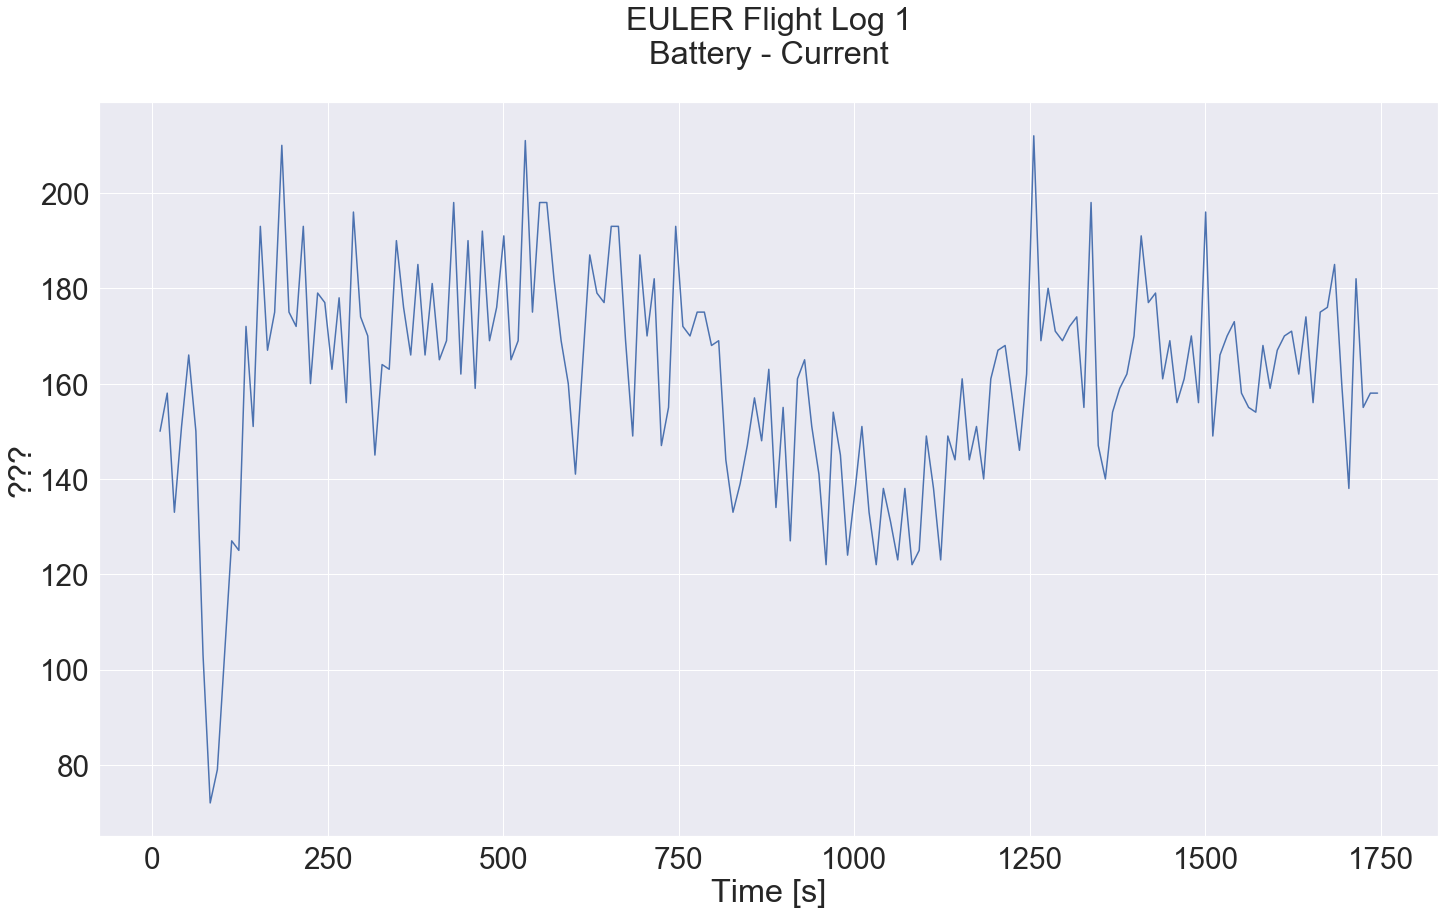

In [24]:
plt = sns.lineplot(data = battery_log[1:], x = 'Time_s', y = 'Current')
plt.set_title(f'EULER Flight Log {log_id}\nBattery - Current\n')
plt.set_ylabel('???')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

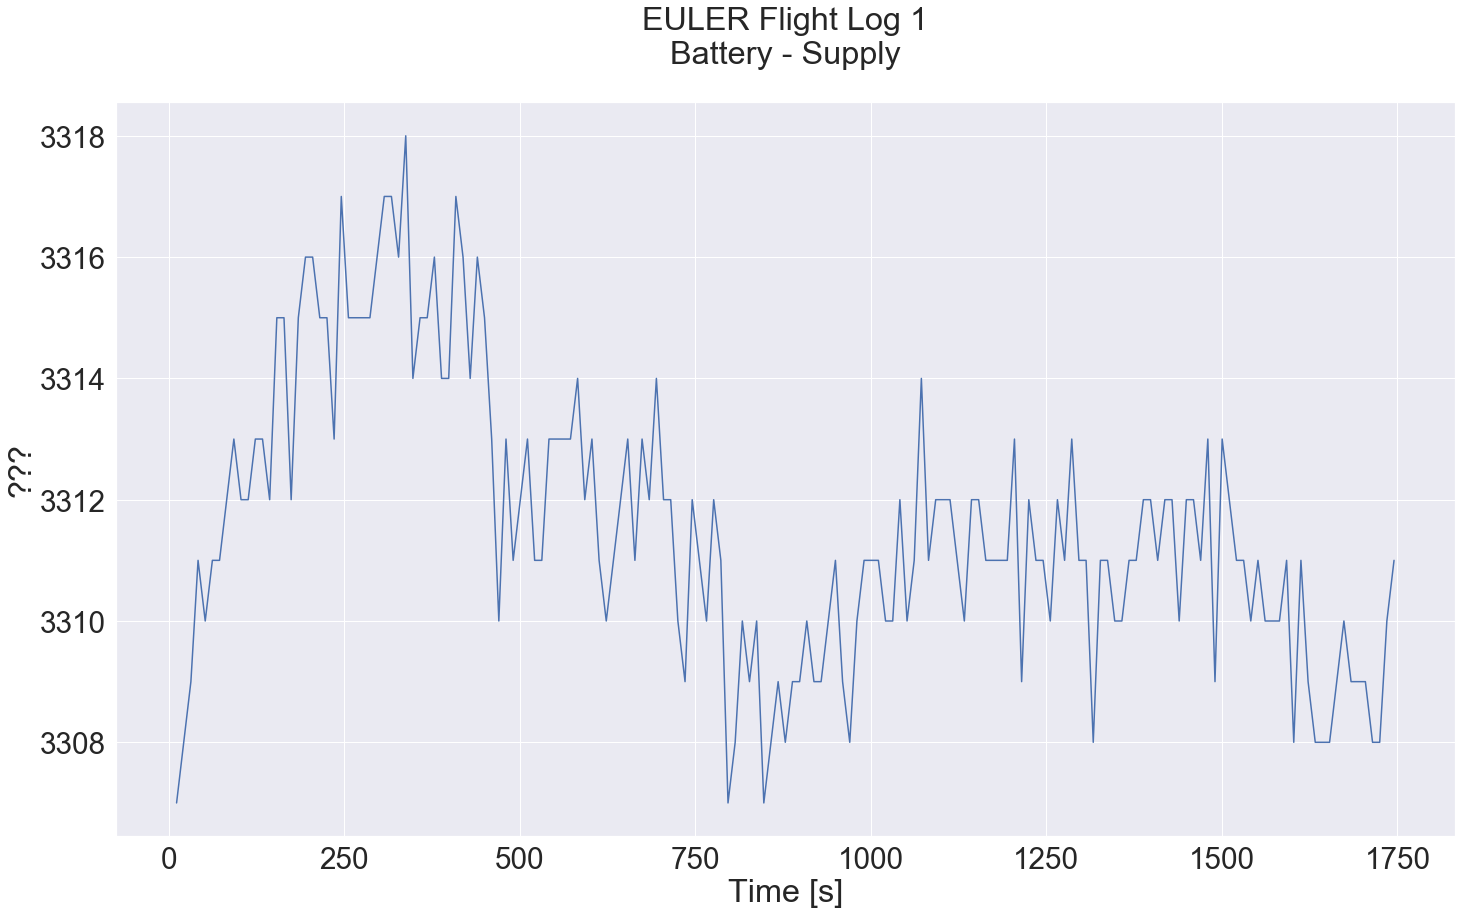

In [25]:
plt = sns.lineplot(data = battery_log[1:], x = 'Time_s', y = 'Supply')
plt.set_title(f'EULER Flight Log {log_id}\nBattery - Supply\n')
plt.set_ylabel('???')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

## Estimator Vars Plotting

In [26]:
estimator_var_log = pd.read_csv(f'{split_logs_dir}/estimator_var.csv', index_col = 0)
#sampling for faster drawing
estimator_var_log = estimator_var_log[::10]
estimator_var_log.head()

,Timestamp,Time_s,Log Entry Type,World Position (z),Rocket Velocity (z),Rocket Acceleration (z)
Log Entry,,,,,,
66,601,0.601,ESTIMATOR_VAR,0.000,0.000,0.000
142,701,0.701,ESTIMATOR_VAR,0.001,0.005,0.000
223,804,0.804,ESTIMATOR_VAR,0.006,0.036,0.000
313,904,0.904,ESTIMATOR_VAR,0.028,0.113,0.000
406,1005,1.005,ESTIMATOR_VAR,0.077,0.133,-0.427


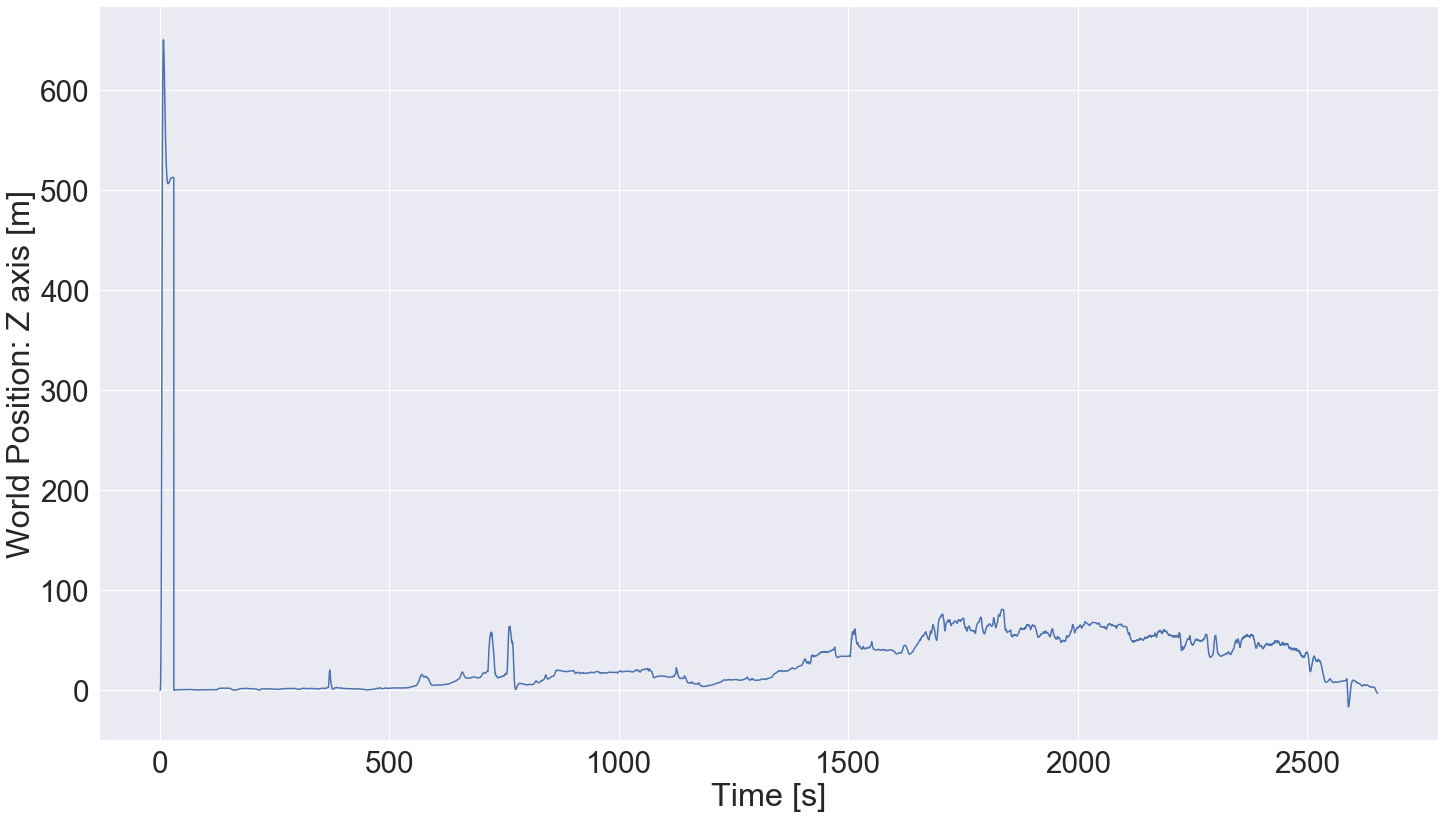

In [27]:
plt = sns.lineplot(data = estimator_var_log[1:], x = 'Time_s', y = 'World Position (z)')
plt.set_ylabel('World Position: Z axis [m]')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

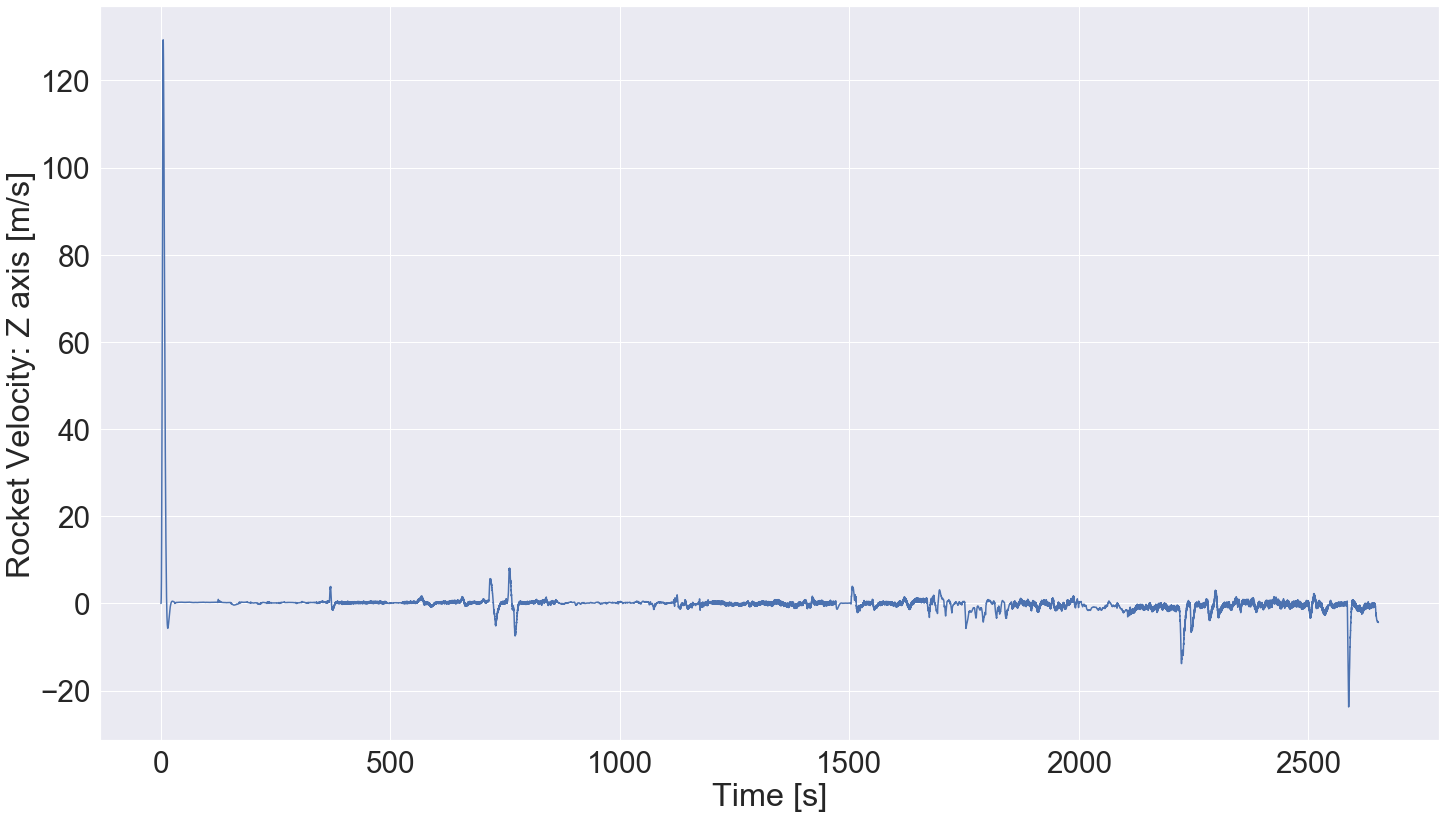

In [28]:
plt = sns.lineplot(data = estimator_var_log[1:], x = 'Time_s', y = 'Rocket Velocity (z)')
plt.set_ylabel('Rocket Velocity: Z axis [m/s]')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

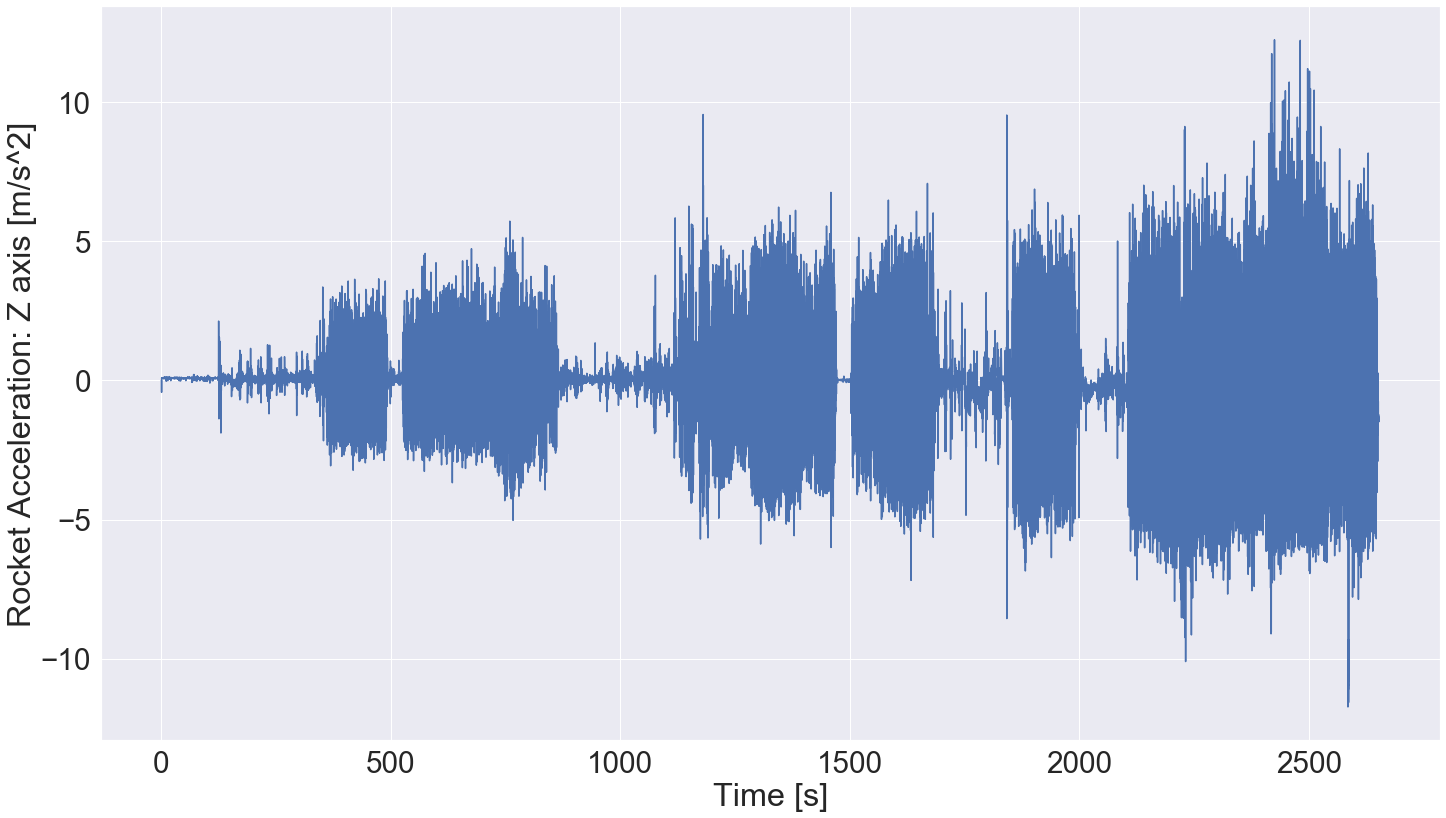

In [29]:
plt = sns.lineplot(data = estimator_var_log[1:], x = 'Time_s', y = 'Rocket Acceleration (z)')
plt.set_ylabel('Rocket Acceleration: Z axis [m/s^2]')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

In [30]:
controller_out_log = pd.read_csv(f'{split_logs_dir}/controller_out.csv', index_col = 0)
controller_out_log.head()

,Timestamp,Time_s,Log Entry Type,Controller Output,Reference Error,Integrated Error
Log Entry,,,,,,
216,801,0.801,CONTROLLER_OUTPUT,0.0,0.0,0.0
225,811,0.811,CONTROLLER_OUTPUT,0.0,0.0,0.0
234,821,0.821,CONTROLLER_OUTPUT,0.0,0.0,0.0
243,831,0.831,CONTROLLER_OUTPUT,0.0,0.0,0.0
252,841,0.841,CONTROLLER_OUTPUT,0.0,0.0,0.0


In [31]:
controller_out_log['Controller Output'].unique()

array([0.])

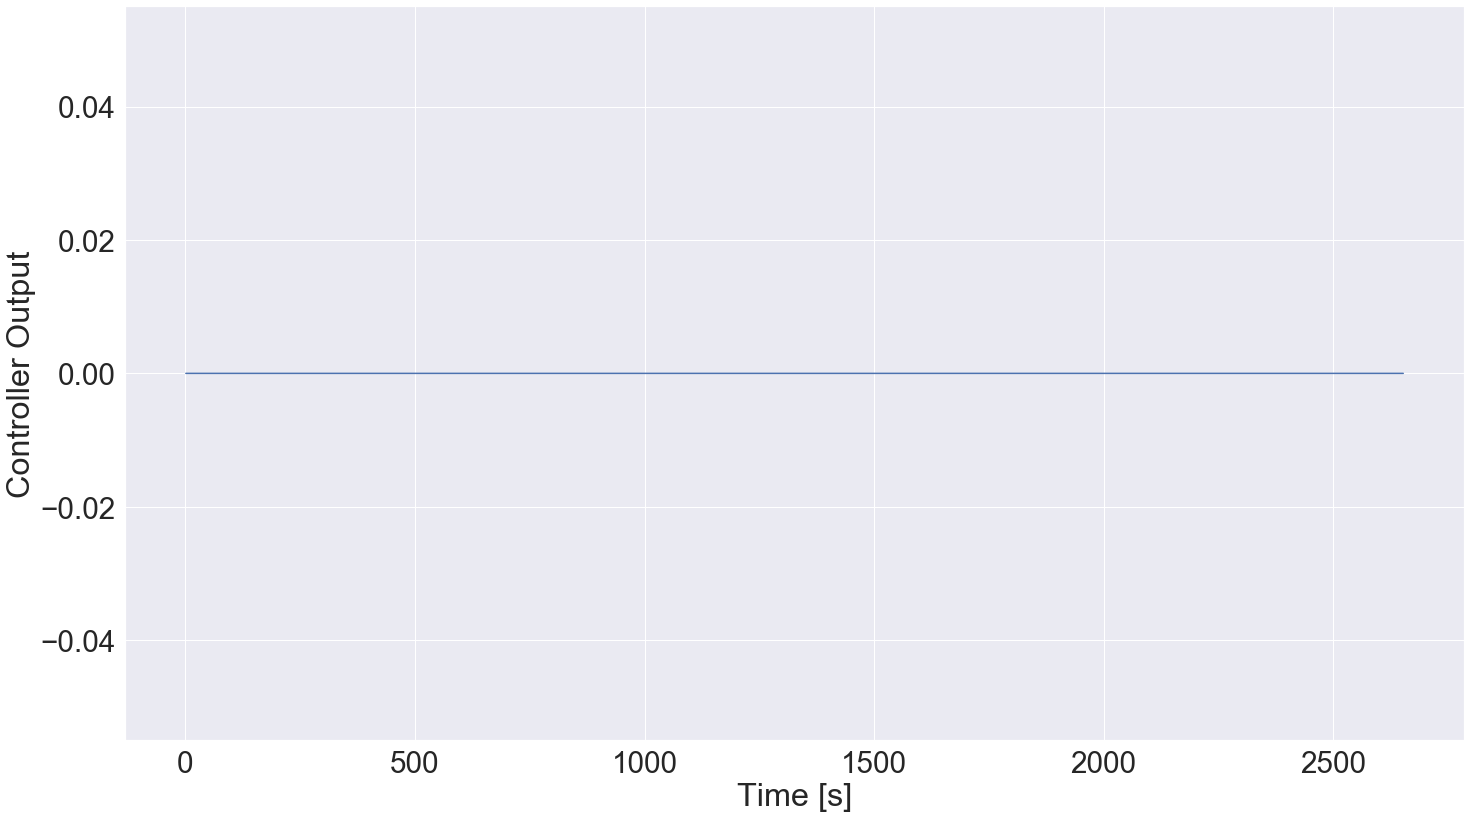

In [32]:
plt = sns.lineplot(data = controller_out_log[1:], x = 'Time_s', y = 'Controller Output')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

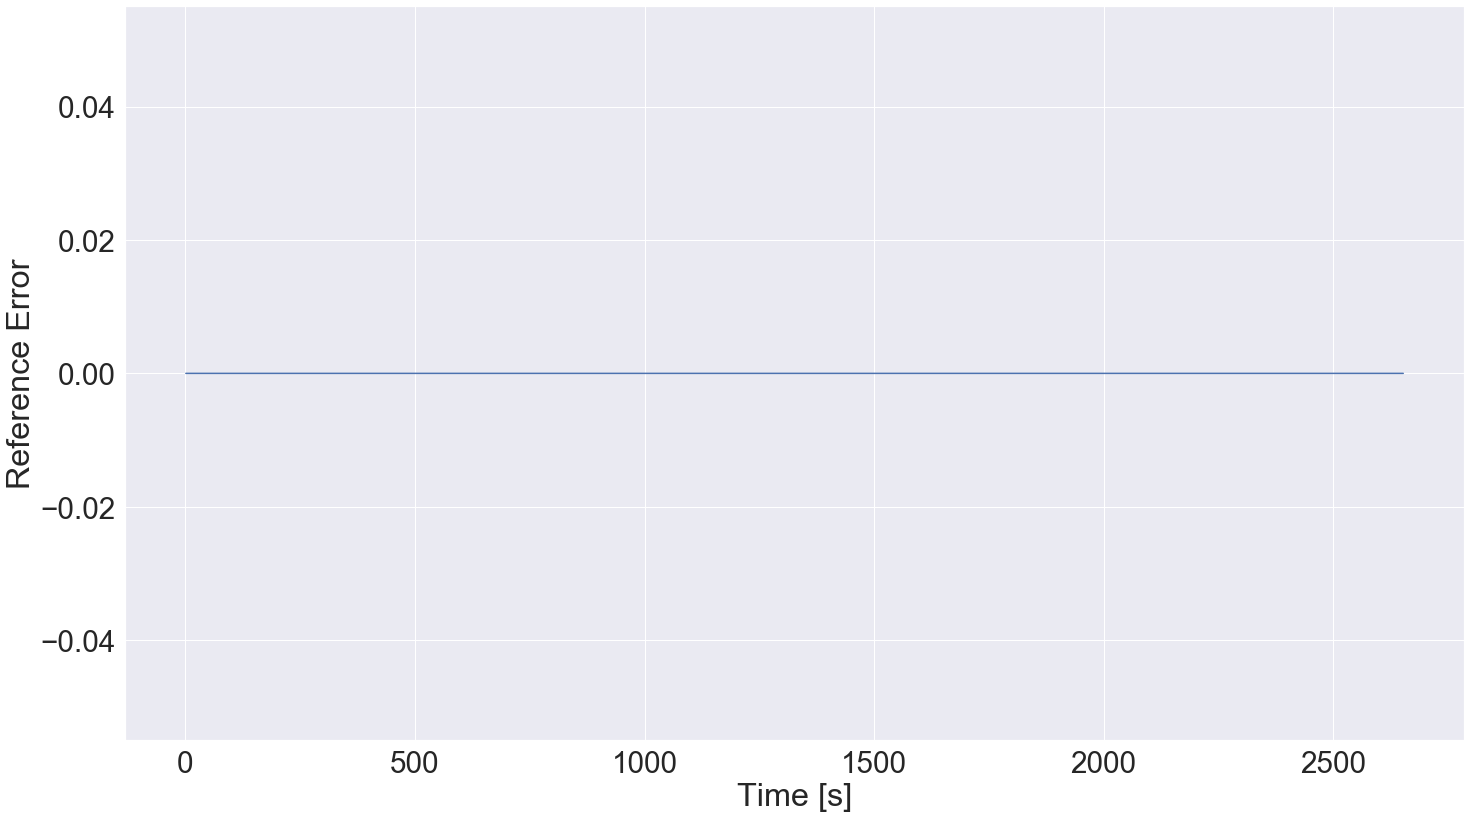

In [33]:
plt = sns.lineplot(data = controller_out_log[1:], x = 'Time_s', y = 'Reference Error')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

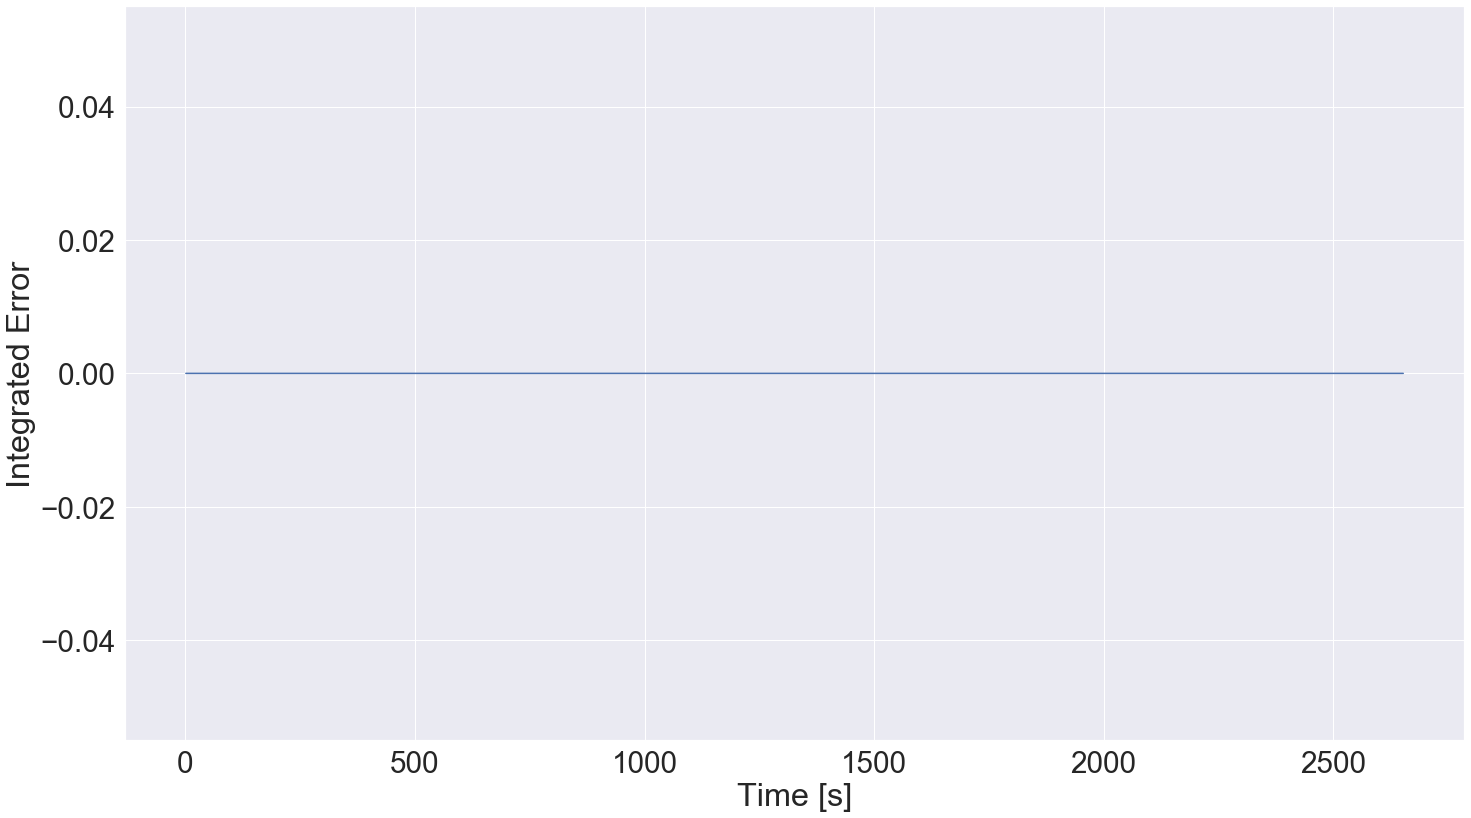

In [34]:
plt = sns.lineplot(data = controller_out_log[1:], x = 'Time_s', y = 'Integrated Error')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)